In [1]:
import h5py as h5;
import numpy as np;
import matplotlib.pyplot as plt;

In [11]:
filedir = '/home/suerfu/nidaq/'
filename = 'NaI_FS_NoSource_D20210106_T144859_F0001.hdf5'
filename = 'NaI_GS_NoSource_D20210106_T145111_F0001.hdf5'
file = h5.File( filedir+filename, 'r' )

ch_indices = file['adc1'].attrs['adc_channel_indices']
nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']
sample_rate = file['adc1'].attrs['sample_rate']
cal = file['adc1'].attrs['adc_conversion_factor']

print( file.attrs['comment'])

b'2-inch NaI detector. No source. Input channel is on GS. '


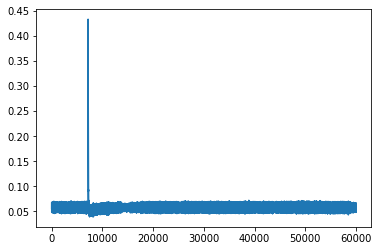

In [18]:
evt_index = 1

fig = plt.plot()

ch_index = 0;

Vcal = np.poly1d( cal[ch_index][::-1] )
event_name = 'event_%d' % evt_index
event = file['adc1'][event_name][ch_index]

plt.plot( Vcal(event[540000:600000]) )
#axs[ch_index].plot( Vcal(event) )

In [9]:
ch_indices.size

1